# Amazigh Alphabets Recognition CNN LeNet-5

# Import libraries

In [28]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading dataset

In [2]:
dataset_path = 'dataset/'

In [3]:
images = []
labels = []

In [4]:
# Loop through the folders in the dataset directory
for folder_name in os.listdir(dataset_path):
    # @param folder_name is the name of each directory (folder), in this case, the name of the character
    folder_path = os.path.join(dataset_path, folder_name)
    # @param folder_path is the path to a folder in our dataset, representing a specific character
    if os.path.isdir(folder_path):
        # Loop through the images in that specific character folder
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            try:
                with Image.open(file_path) as img:
                    # Convert the image into a numpy array
                    img_array = np.array(img)
                    # Add the image to our list of images
                    images.append(img_array)
                    # Add the label to our list of labels
                    labels.append(folder_name)
            except Exception as e:
                print(f'Cannot open the image {file_path}: {e}')


In [5]:
# Create a DataFrame
df = pd.DataFrame({'image': images, 'label': labels})

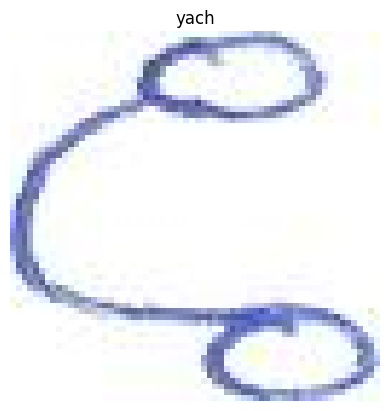

In [14]:
# Function to display an image from our dataset
def show_image(image, title):
    plt.imshow(image, cmap='gray')  # Display the image in grayscale
    plt.title(title)  # Set the title of the plot to the label of the image
    plt.axis('off')   # Hide the axes
    plt.show()        # Show the plot

# Show the image at index 'i' in the dataset
i = 1602
show_image(df['image'].iloc[i], df['label'].iloc[i])

In [15]:
df.head()

,image,label
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ya
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ya
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ya
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ya
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ya


In [31]:
# Doing this because in some of dataset there was some gray images
def grayscale_to_rgb(image):
    # Convert a grayscale image to RGB format
    return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Convert all grayscale images to RGB format
converted_images = []
for img in images:
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    # Check if the image is grayscale (i.e., has only 2 dimensions)
    if len(img_array.shape) == 2:  # If the image is grayscale
        # Convert the grayscale image to RGB format
        img_array = grayscale_to_rgb(img_array)
    
    # Append the converted image to the list
    converted_images.append(img_array)

# Convert the list of images to a NumPy array
converted_images = np.array(converted_images)

In [32]:
# Check the dimensions of each image
shapes = [img.shape for img in converted_images]
unique_shapes = set(shapes)

# Print the unique image shapes found in the dataset
print("Unique image shapes in the dataset:", unique_shapes)

# Ensure all images have the same shape
if len(unique_shapes) > 1:
    # If there is more than one unique shape, print an error message
    print("Error: Images with different sizes found.")
else:
    # If all images have the same shape, print a confirmation message
    print("All images have the same size.")

Unique image shapes in the dataset: {(64, 64, 3)}
All images have the same size.


In [34]:
# Assign the converted images to the variable `images`
images = converted_images

In [39]:
# If the images do not have 3 channels (RGB) and are instead in grayscale, we need to use np.expand_dims to add the channel dimension.
images.shape

(25740, 64, 64, 3)

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Divide the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [45]:
print("Image Shape: {}".format(X_train[0].shape), end = '\n\n')
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set:   {} samples".format(len(X_val)))
print("Test Set:       {} samples".format(len(X_test)))

Image Shape: (64, 64, 3)

Training Set:   16473 samples
Validation Set:   4119 samples
Test Set:       5148 samples


# Data preprocessing

## Reshape the image into a 68x68x1 shape

In [53]:
# Padding the images with 2 pixels on each side (top, bottom, left, right)
X_train_padded = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val_padded = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test_padded = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Updated Image Shape for: ", end='\n\n')
print("-Training set: {}".format(X_train_padded.shape))
print("-Validation set: {}".format(X_val_padded.shape))
print("-Test set: {}".format(X_test_padded.shape))

Updated Image Shape for: 

-Training set: (16473, 68, 68, 3)
-Validation set: (4119, 68, 68, 3)
-Test set: (5148, 68, 68, 3)


## Normalize and subtract the mean from all the data set

In [54]:
# Normalization.
X_train, X_val, X_test = X_train/float(255), X_val/float(255), X_test/float(255)
# Compute the mean of the training data
mean = np.mean(X_train, axis=(0, 1, 2, 3))  # Mean across height, width, and channels
X_train -= mean
X_val   -= mean
X_test  -= mean

# Data visualization

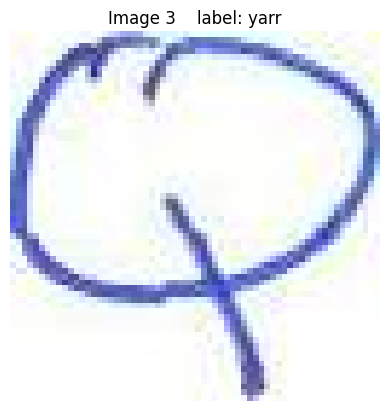

In [64]:
# Index of image
index = 3
# recover the true value of imagee
X_train_visualize = X_train[index] + mean
# visualize the image
plt.imshow(X_train_visualize)
plt.title(f'Image {index}    label: {y_train[index]}')
plt.axis('off')
plt.show()
